# Insurance Case Study

## Problem Statement

MedicaInsure is a medical insurance provider. Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, analysis of customer attributes like age, sex, smoking habits, etc. can be crucial in making decisions regarding the premium amount to be charged. 

The insurance company wants to know whether the proportion of female smokers is different from the proportion of male smokers in their customer population.

They have provided a sample dataset of customers and the charges claimed by them.

### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import the required function
from statsmodels.stats.proportion import proportions_ztest

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the data into the DataFrame

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
# checking the shape of the data
df.shape

(1338, 7)

* The datset consists of 1338 rows and 7 columns

In [5]:
# inspecting the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* There are 4 numeric variables and 3 categorical variables

In [6]:
# checking if there are any missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* There are no missing values in the data

In [7]:
# checking the first 5 rows of the data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analysis

# Exploring the numerical variables first

In [8]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# a function that will help us create a boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
    
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [29]:
from pandas_profiling import ProfileReport
# Use the original dataframe, so that original features are considered
prof = ProfileReport(df)
# to view report created by pandas profile
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

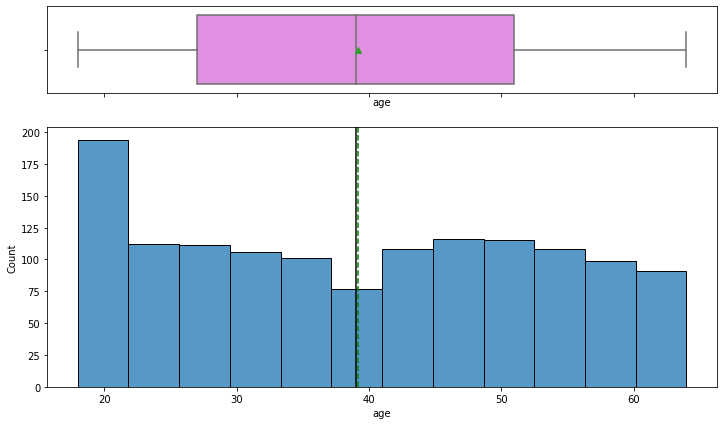

In [9]:
histogram_boxplot(df, 'age')

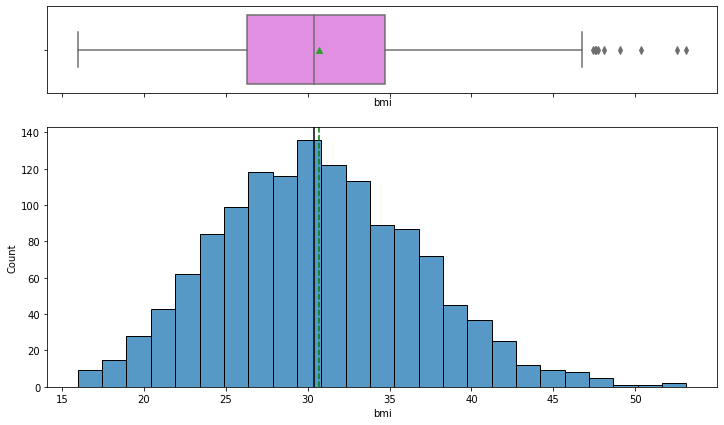

In [10]:
histogram_boxplot(df, 'bmi')

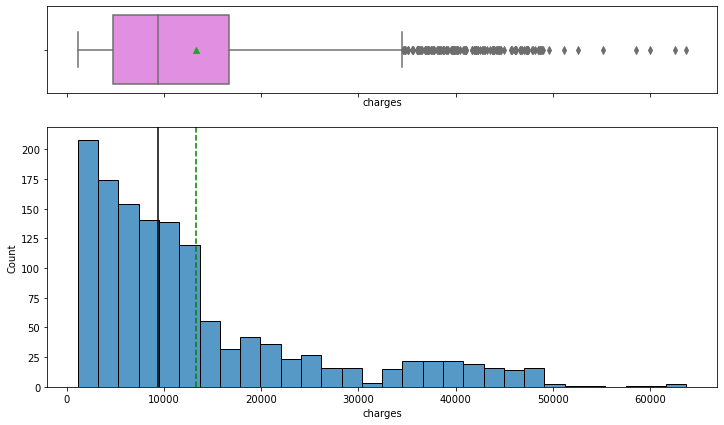

In [11]:
histogram_boxplot(df, 'charges')

# Exploring the categorical variables now

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<Figure size 720x504 with 0 Axes>

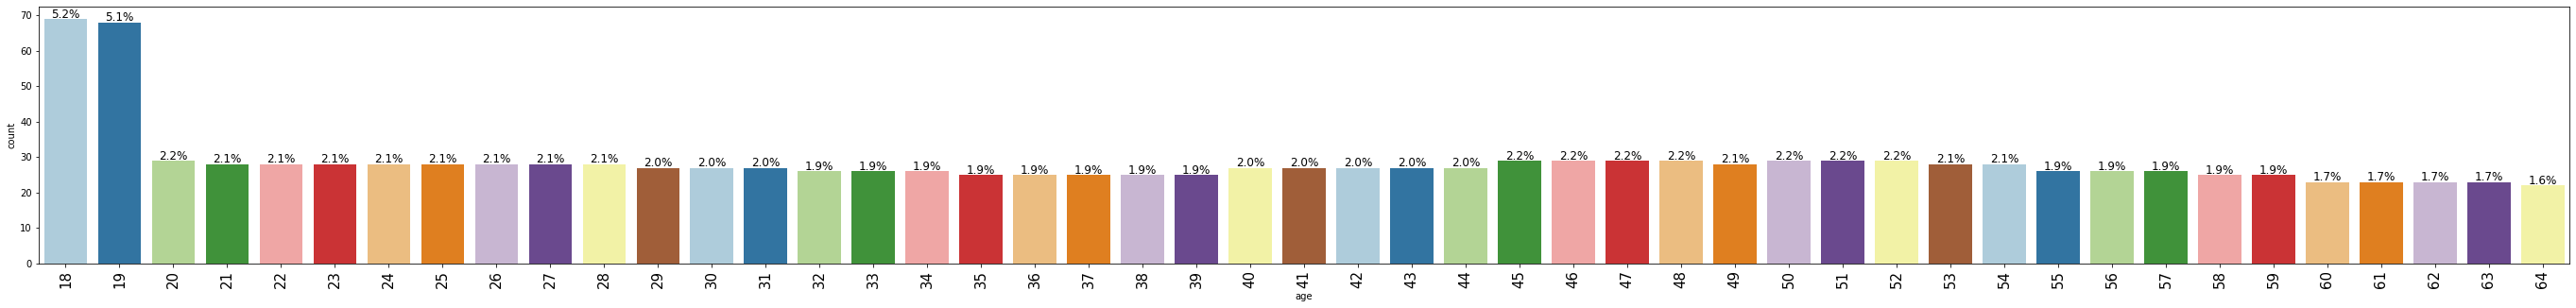

In [13]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'age', perc=True)

<Figure size 720x504 with 0 Axes>

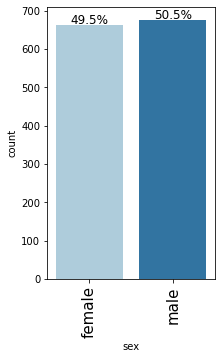

In [14]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'sex', perc=True)

<Figure size 720x504 with 0 Axes>

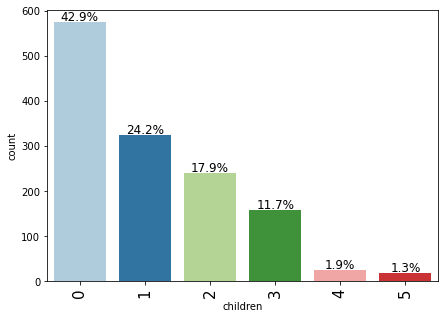

In [15]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'children', perc=True)

<Figure size 720x504 with 0 Axes>

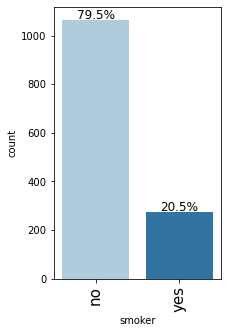

In [16]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'smoker', perc=True)

<Figure size 720x504 with 0 Axes>

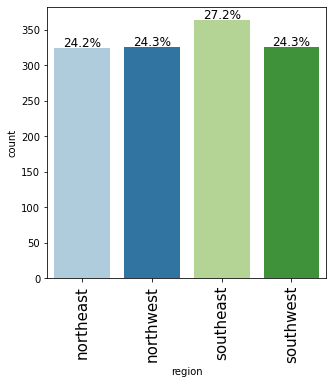

In [17]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'region', perc=True)

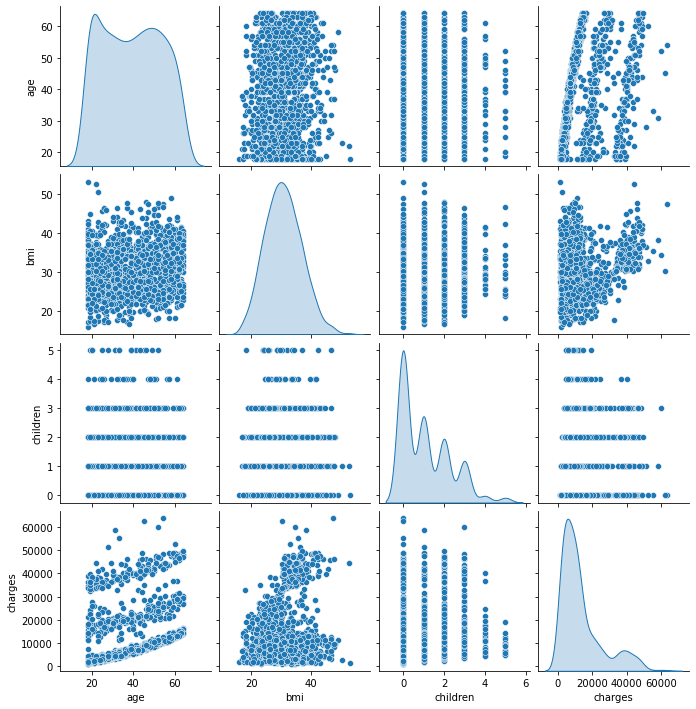

In [18]:
sns.pairplot(df, diag_kind="kde")

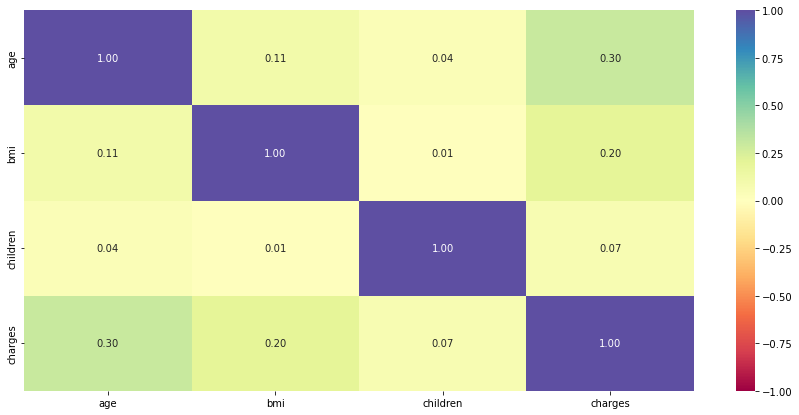

In [19]:
correlation = df.corr() # creating a 2-D Matrix with correlation plots
correlation
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Age v Charges

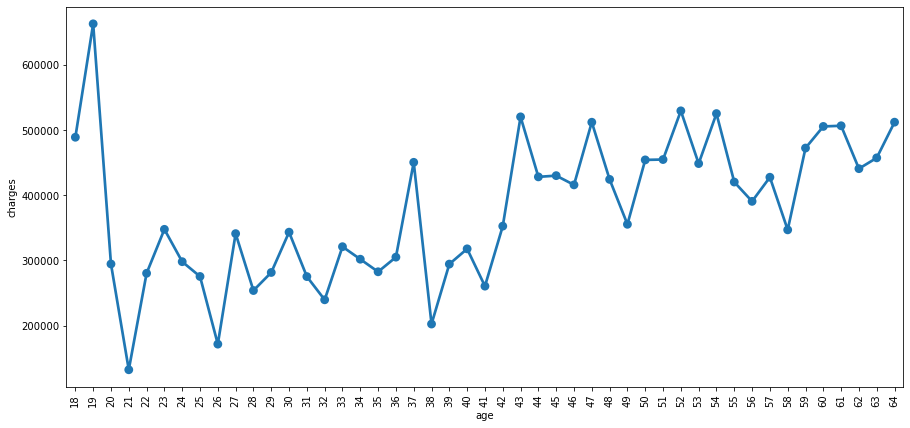

In [21]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='age', y='charges', data=df, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

## Step 1: Define null and alternative hypotheses

* 'sex' and 'smoker' are two categorical variables.
* We want to see if the proportion of smokers in the female population is significantly different from the proportion of smokers in male population.

**$H_0:$ The proportion of smokers in the female population is equal to the proportion of smokers in the male population.**

**$H_a:$ The proportion of smokers in the female population is not equal to the proportion of smokers in the male population**

## Step 2: Select Appropriate test

The formulated hypotheses are concerned with proportions. A test of proportions can be used to analyse the hypotheses and draw a conclusion. We shall use a Proportions Z test for this problem.

## Step 3: Decide the significance level

Here, we select α = 0.05.

## Step 4: Data Preparation

### Preparing data for test

In [ ]:
# number of female smokers
female_smokers = df[df['sex']=='female'].smoker.value_counts()['yes']
# number of male smokers
male_smokers = df[df['sex']=='male'].smoker.value_counts()['yes']

print('The numbers of female and male smokers are {0} and {1} respectively'.format(female_smokers, male_smokers))

# number of females in the data
n_females = df.sex.value_counts()['female']

# number of males in the data
n_males = df.sex.value_counts()['male']

print('The total numbers of females and males are {0} and {1} respectively'.format(n_females, n_males))

In [ ]:
print(f' The proportions of smokers in females and males are {round(115/662,2)}, {round(159/676,2)} respectively')

* The proportions in the sample are different. Let's conduct the test to see if this difference is significant.

## Step 5: Calculate the p-value

In [ ]:
# find the p-value using proportion_ztest
stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males], alternative = 'two-sided')

# print the p-value
print('The p-value is '+ str(pval))

## Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if pval < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

## Step 7: Conclusion

Since the pvalue is < 0.05, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the proportion of smokers in the female population is different from the proportion of smokers in the male population.

### Insight

The proportions of female smokers is different from the proportions of male smokers in the insurance company's customer population.